In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.neighbors import KNeighborsClassifier as KNC
from sklearn import svm


from sklearn.model_selection import ParameterGrid
from sklearn.model_selection import GridSearchCV

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
rand_seed_int = 7739
sns.set(style="whitegrid", color_codes=True)
%matplotlib inline

In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [4]:
path_to_data = "./Dataset/"  # generate paths
file_names = ["user_a.csv", "user_b.csv", "user_c.csv", "user_d.csv"]
data_paths = [path_to_data + fn for fn in file_names]
# print(data_paths)

In [5]:
user_dfs = [pd.read_csv(data_path) for data_path in data_paths]

In [6]:
for df, letter in zip(user_dfs, "ABCD"):
    df['user'] = pd.Series(letter, index=df.index) # append categorical variable denoting user

In [7]:
print( [user_dfs[i].shape for i in range(len(user_dfs))])
df = pd.concat(user_dfs, axis=0)

[(2880, 114), (2880, 114), (2880, 114), (2880, 114)]


In [8]:
df

,Class,AF3 delta std,AF3 delta m,AF3 theta std,AF3 theta m,AF3 alpha std,AF3 alpha m,AF3 beta std,AF3 beta m,F7 delta std,...,F8 beta m,AF4 delta std,AF4 delta m,AF4 theta std,AF4 theta m,AF4 alpha std,AF4 alpha m,AF4 beta std,AF4 beta m,user
0,1.0,3569.164550,2063.892754,1.673726,4.444736,0.526209,3.002088,1.425022,3.302739,3563.803888,...,72.508750,3701.186330,2182.676835,18.192418,41.349662,16.004756,42.046467,46.280843,73.565719,A
1,1.0,3568.423670,2063.099248,1.897790,3.728823,1.304186,1.854353,1.366575,2.546458,3563.560922,...,66.931186,3725.210509,2180.197439,8.820788,38.012788,19.601233,29.431054,38.559351,67.470041,A
2,1.0,3568.157929,2062.445859,2.798014,2.574504,1.120537,1.958819,0.982433,2.258622,3563.279981,...,66.816547,3724.417296,2176.823208,18.159202,23.612639,14.378291,19.555084,43.210004,67.781924,A
3,1.0,3567.710021,2062.112673,2.181775,3.610507,0.629608,2.155876,0.856275,2.233711,3562.787801,...,63.915386,3725.822160,2177.089059,19.737616,29.484396,15.793034,25.713513,39.250246,65.031031,A
4,1.0,3565.546124,2063.128867,1.685161,3.384311,0.677526,1.795798,0.927924,1.909810,3562.655091,...,64.534645,3723.053978,2167.798335,8.429414,26.374975,14.920736,35.675266,33.901687,66.956313,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2875,0.0,3572.183440,2063.784708,1.229472,2.118878,0.554802,1.531674,1.515939,2.064786,3564.057879,...,1.589724,3568.988084,2063.376781,0.731822,1.842909,0.271320,1.235039,1.081958,2.239726,D
2876,0.0,3571.739312,2062.870495,1.131872,2.143829,0.600867,2.161191,1.481767,1.981241,3564.245318,...,1.474497,3569.102041,2063.103722,0.914127,2.014998,0.249743,1.573777,1.254084,2.494333,D
2877,0.0,3571.184751,2063.216128,1.139433,2.066175,0.613243,2.005979,1.202326,1.918536,3564.496395,...,1.539265,3569.136435,2063.114849,0.982602,2.111638,0.943919,1.525629,1.244487,2.555489,D
2878,0.0,3570.595817,2062.900476,1.013536,1.579048,0.214779,1.701602,1.314499,1.782709,3564.497194,...,1.475072,3567.959877,2062.375466,1.036738,2.004392,1.395303,1.550127,1.095299,2.372722,D


In [9]:
df = df.sample(frac=1, random_state=rand_seed_int).reset_index(drop=True)  # shuffle and reindex dataframe

In [10]:
df

,Class,AF3 delta std,AF3 delta m,AF3 theta std,AF3 theta m,AF3 alpha std,AF3 alpha m,AF3 beta std,AF3 beta m,F7 delta std,...,F8 beta m,AF4 delta std,AF4 delta m,AF4 theta std,AF4 theta m,AF4 alpha std,AF4 alpha m,AF4 beta std,AF4 beta m,user
0,1.0,3572.740122,2065.925458,1.185344,2.313863,1.511347,1.779033,2.151755,2.702375,3568.188014,...,25.944354,3608.920898,2092.725560,3.459469,15.541393,10.217921,19.738413,28.741694,29.452970,A
1,2.0,3575.217662,2066.069769,1.048088,1.567821,1.594162,2.048887,2.070036,2.610019,3566.182191,...,2.234100,3572.622773,2064.425045,1.262161,1.510096,0.621931,1.985719,1.495773,2.064559,B
2,1.0,3569.482772,2062.449313,0.775122,1.993172,0.789177,2.411156,1.337159,2.445601,3561.976864,...,2.013047,3568.347818,2061.632880,0.986714,2.487093,1.127154,2.075247,1.134185,2.337065,D
3,0.0,3566.556878,2062.149296,1.272005,1.885792,0.580135,2.125361,0.932530,2.268825,3563.785619,...,2.060122,3566.443267,2060.940128,1.127451,2.665813,1.528374,2.223407,1.027889,2.193454,D
4,0.0,3569.869503,2063.306770,0.719125,1.153106,0.886325,2.028228,2.932595,3.581840,3565.626072,...,28.696374,3644.890238,2116.975932,4.794681,11.841362,4.188648,14.678540,38.839145,35.139374,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11515,1.0,3565.689279,2065.479288,0.580389,2.823328,0.771873,3.011752,3.148538,4.433364,3575.116521,...,26.749057,3572.314504,2111.389578,3.112227,12.396598,2.247408,6.379228,1.532029,4.262639,C
11516,1.0,3571.098846,2064.594995,1.729041,3.425471,1.128479,1.624798,3.489636,3.943141,3574.792999,...,12.119590,3563.429987,2068.539135,1.923759,2.602696,1.248980,2.665588,2.753850,3.565360,C
11517,2.0,3574.547889,2066.745873,0.332495,2.616315,0.708282,1.615514,2.682437,3.009752,3568.716436,...,1.943236,3573.420786,2065.512823,0.868336,2.006091,0.339171,1.000358,1.656243,2.944557,B
11518,1.0,3569.127228,2063.362552,0.358300,1.791695,0.930024,2.264602,0.981592,2.290724,3564.184687,...,1.963345,3570.610368,2063.540624,0.641076,1.268576,1.192215,1.969478,1.153423,2.596662,D


In [11]:
def data_process(df):
    # generate one hot encoded dummy variables for user categories
    user_dummies = pd.get_dummies(df['user'], prefix='user')

    # user_dummies
    # concatenate dummies and drop orig user feature
    df = pd.concat([df, user_dummies], axis=1)
    df = df.drop('user', axis=1)
    
    # separate target feature class from data
    y = df['Class'].copy()
    X = df.drop('Class', axis=1)
    
    # dummy columns to not transform
    cols_to_std = list(X.columns[:-4])
    
    # cast target as integer
    y = y.astype(int)
    
    # split into training and testing sets: 80% train, 20% test
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=rand_seed_int)
    
    # decided to use k-fold cv rather than leave-one-out cross-validation
    # I think k-fold makes more sense with respect to the # of observations
    # split training into training and validation sets: 70% train, 30% validation
    # X_train, X_val, y_train, y_val = train_test_split(X_Train, y_Train, train_size=0.7, random_state=rand_seed_int)
    
    # scale frequencies s.t. features are normalized and dummies are left alone

    ct = ColumnTransformer([
            ('blah_standard_scaler', StandardScaler(), cols_to_std)
        ], remainder='passthrough')
    
    ct.fit(X_train)
    # return as dataframes
    X_train = pd.DataFrame(ct.transform(X_train), columns=X.columns)
    # X_val   = pd.DataFrame(ct.transform(X_val), columns=X.columns)
    X_test  = pd.DataFrame(ct.transform(X_test), columns=X.columns)
    
    # print(ct.named_transformers_)
    
    # return X_train, y_train, X_val, y_val, X_test, y_test
    return X_train, y_train, X_test, y_test

In [12]:
# X_train, y_train, X_val, y_val, X_test, y_test = data_process(df)
X_train, y_train, X_test, y_test = data_process(df)

In [13]:
X_train

,AF3 delta std,AF3 delta m,AF3 theta std,AF3 theta m,AF3 alpha std,AF3 alpha m,AF3 beta std,AF3 beta m,F7 delta std,F7 delta m,...,AF4 theta std,AF4 theta m,AF4 alpha std,AF4 alpha m,AF4 beta std,AF4 beta m,user_A,user_B,user_C,user_D
0,-0.512224,-0.672548,0.185588,0.125307,2.764138,0.764986,-1.296539,-0.955065,-0.879263,-0.562871,...,-0.440912,-0.405671,-0.377965,-0.496969,-0.539410,-0.528835,0.0,0.0,0.0,1.0
1,-0.351427,-0.349637,-0.318874,-0.598020,0.639897,1.267067,0.950030,1.652566,1.624179,1.644434,...,-0.529805,-0.450101,-0.130521,-0.422896,-0.493541,-0.482568,0.0,0.0,1.0,0.0
2,-0.202096,-0.182844,0.160312,0.124356,-0.214642,0.122180,-0.862074,-0.464742,-0.500001,-0.521718,...,1.463166,0.574310,3.377459,1.870127,0.525448,1.744057,1.0,0.0,0.0,0.0
3,-0.428892,-0.265401,-0.225800,-0.991139,0.121445,1.005085,1.893015,0.930144,0.626798,0.422674,...,-0.060217,-0.189309,-0.475156,-0.433042,-0.499584,-0.526896,0.0,0.0,1.0,0.0
4,-0.193209,-0.476222,-0.145892,-0.465681,-1.787153,-1.766610,-0.872115,-1.053123,-1.460612,-0.778014,...,-0.525641,-0.409948,-0.240856,-0.492232,-0.540042,-0.549973,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9211,-0.065508,-0.359403,-0.506200,0.166998,-0.715704,-0.267043,-0.865888,-1.078102,-1.129743,-1.500955,...,-0.341631,-0.488714,-0.451617,-0.567404,-0.509289,-0.540810,0.0,0.0,0.0,1.0
9212,-0.511870,-0.500803,1.553980,0.499305,1.820197,0.880486,-1.290339,-1.262719,-0.654466,-0.425025,...,-0.323490,-0.255664,-0.372590,-0.485677,-0.544481,-0.541396,0.0,0.0,0.0,1.0
9213,-0.204451,-0.078696,1.389852,0.120734,0.881718,0.072730,-1.181189,-0.726111,-0.983185,-0.721704,...,-0.045325,-0.331241,-0.535916,-0.460987,-0.527359,-0.567371,0.0,0.0,0.0,1.0
9214,0.044088,-0.270784,0.377097,-0.852714,-0.466895,-0.954969,-0.686164,-0.834179,-0.419934,-0.243665,...,-0.185725,-0.460024,-0.488154,-0.574551,-0.532168,-0.549059,0.0,1.0,0.0,0.0


In [14]:
print("X_train shape", X_train.shape)
print("X_test shape", X_test.shape)

X_train shape (9216, 116)
X_test shape (2304, 116)


### LDA: best params were {'shrinkage': 0.0001, 'solver': 'lsqr'}, find train and val accuracies as shrinkage varies

In [15]:
# LDA Tuning
param_grid = {
    'shrinkage': [1.0, 0, 0.1, 0.01, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8],
    'solver': ['lsqr']
}

gs = GridSearchCV(
    LDA(),
    param_grid=param_grid,
    verbose=1,
    cv=5,
    n_jobs=-1,
    return_train_score = True
)

lda_gs_results = gs.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [16]:
lda_gs_results.cv_results_

{'mean_fit_time': array([0.22084866, 0.21380243, 0.23581753, 0.21351609, 0.22596068,
        0.22339396, 0.20370069, 0.23390388, 0.22505293, 0.18818407]),
 'std_fit_time': array([0.01717007, 0.01535722, 0.01736401, 0.00683963, 0.02595087,
        0.01914346, 0.00641767, 0.02283152, 0.02038626, 0.03005945]),
 'mean_score_time': array([0.00825901, 0.0072103 , 0.00762672, 0.0079854 , 0.00677547,
        0.00574813, 0.00553946, 0.0068728 , 0.00682292, 0.00521245]),
 'std_score_time': array([0.00380016, 0.00186438, 0.00101022, 0.00168104, 0.00100147,
        0.00057166, 0.00040328, 0.00114155, 0.00074145, 0.00110837]),
 'param_shrinkage': masked_array(data=[1.0, 0, 0.1, 0.01, 0.001, 0.0001, 1e-05, 1e-06, 1e-07,
                    1e-08],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'param_solver': masked_array(data=['lsqr', 'lsqr', 'lsqr', 'lsqr', 'lsqr', 'lsqr', 'lsqr',
 

In [17]:
lda_train_scores = lda_gs_results.cv_results_['mean_train_score']
lda_gs_results.cv_results_['mean_train_score']

array([0.37014433, 0.47989902, 0.45477974, 0.46858718, 0.47783741,
       0.48003462, 0.4797905 , 0.47987189, 0.47987189, 0.47989902])

In [18]:
lda_val_scores = lda_gs_results.cv_results_['mean_test_score']
lda_gs_results.cv_results_['mean_test_score']

array([0.36642852, 0.45214778, 0.4364155 , 0.44531322, 0.45117181,
       0.45225612, 0.45193074, 0.45214778, 0.45214778, 0.45214778])

In [19]:
lda_gs_results.cv_results_['params']

[{'shrinkage': 1.0, 'solver': 'lsqr'},
 {'shrinkage': 0, 'solver': 'lsqr'},
 {'shrinkage': 0.1, 'solver': 'lsqr'},
 {'shrinkage': 0.01, 'solver': 'lsqr'},
 {'shrinkage': 0.001, 'solver': 'lsqr'},
 {'shrinkage': 0.0001, 'solver': 'lsqr'},
 {'shrinkage': 1e-05, 'solver': 'lsqr'},
 {'shrinkage': 1e-06, 'solver': 'lsqr'},
 {'shrinkage': 1e-07, 'solver': 'lsqr'},
 {'shrinkage': 1e-08, 'solver': 'lsqr'}]

In [20]:
lda_shrnks = [pdict['shrinkage'] for pdict in lda_gs_results.cv_results_['params']]
print(lda_shrnks)

[1.0, 0, 0.1, 0.01, 0.001, 0.0001, 1e-05, 1e-06, 1e-07, 1e-08]


<ipython-input-84-91ba0149fd58>:3: RuntimeWarning: divide by zero encountered in log10
  ax.plot(np.log10(lda_shrnks), lda_train_scores, color='teal', label='Training Accuracies')
<ipython-input-84-91ba0149fd58>:4: RuntimeWarning: divide by zero encountered in log10
  ax.plot(np.log10(lda_shrnks), lda_val_scores, color='purple', label='Validation Accuracies')


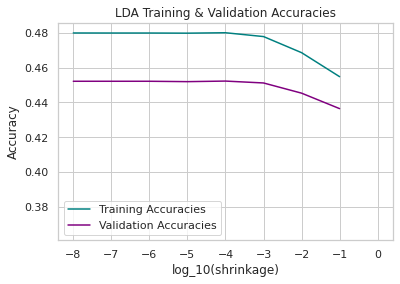

In [84]:
fig, ax = plt.subplots()
ax.set_title('LDA Training & Validation Accuracies')
ax.plot(np.log10(lda_shrnks), lda_train_scores, color='teal', label='Training Accuracies')
ax.plot(np.log10(lda_shrnks), lda_val_scores, color='purple', label='Validation Accuracies')
ax.set_xlabel("log_10(shrinkage)")
ax.set_ylabel("Accuracy")
ax.legend()
plt.savefig("lda_train_vs_val_accuracy.png")
plt.show()

### QDA: best params were {'reg_param': 0.1, 'tol': 0.0001}, find train and val accuracies as shrinkage varies

In [22]:
# QDA Tuning
param_grid = {
    'reg_param': [0, 0.1, 0.2, 0.4, 0.6, 0.8, 0.9, 1.0, 2.0],
    'tol': [0.0001]
}

gs = GridSearchCV(
    QDA(),
    param_grid=param_grid,
    verbose=1,
    cv=5,
    n_jobs=-1,
    return_train_score = True
)

qda_gs_results = gs.fit(X_train, y_train)

qda_train_scores = qda_gs_results.cv_results_['mean_train_score']
qda_val_scores = qda_gs_results.cv_results_['mean_test_score']
qda_reg_param = [pdict['reg_param'] for pdict in qda_gs_results.cv_results_['params']]




Fitting 5 folds for each of 9 candidates, totalling 45 fits


/home/blah/.pyenv/versions/3.8.7/envs/cs289_proj_tf/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


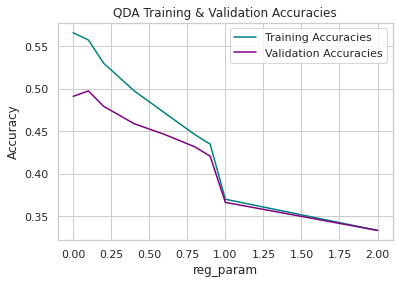

In [82]:
fig, ax = plt.subplots()
ax.set_title('QDA Training & Validation Accuracies')
ax.plot((qda_reg_param), qda_train_scores, color='teal', label='Training Accuracies')
ax.plot((qda_reg_param), qda_val_scores, color='purple', label='Validation Accuracies')
ax.set_xlabel("reg_param")
ax.set_ylabel("Accuracy")
ax.legend()
plt.savefig("qda_train_vs_val_accuracy.png")
plt.show()

### KNC: best params were {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}, find train and val accuracies as neighbors varies

In [28]:
# KNC Tuning
param_grid = {
    'n_neighbors': [ 3, 5, 7, 9, 11, 13, 15, 17, 19],
    'weights': ['distance'],
    'metric': ['manhattan']
}

gs = GridSearchCV(
    KNC(),
    param_grid=param_grid,
    verbose=1,
    cv=5,
    n_jobs=-1,
    return_train_score = True

)

knc_gs_results = gs.fit(X_train, y_train)

knc_gs_results = gs.fit(X_train, y_train)

knc_train_scores = knc_gs_results.cv_results_['mean_train_score']
knc_val_scores = knc_gs_results.cv_results_['mean_test_score']
knc_n_nghb = [pdict['n_neighbors'] for pdict in knc_gs_results.cv_results_['params']]


Fitting 5 folds for each of 9 candidates, totalling 45 fits
Fitting 5 folds for each of 9 candidates, totalling 45 fits


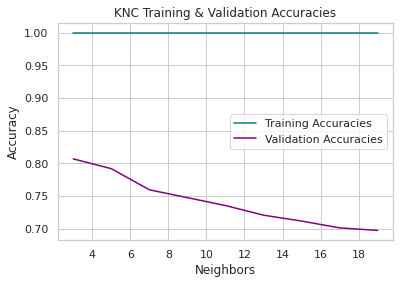

In [81]:
fig, ax = plt.subplots()
ax.set_title('KNC Training & Validation Accuracies')
ax.plot((knc_n_nghb), knc_train_scores, color='teal', label='Training Accuracies')
ax.plot((knc_n_nghb), knc_val_scores, color='purple', label='Validation Accuracies')
ax.set_xlabel("Neighbors")
ax.set_ylabel("Accuracy")
ax.legend()
plt.savefig("knc_train_vs_val_accuracy.png")
plt.show()

In [31]:
X_Train = X_train.copy()


### create validation set for RNN training
X_train_fc ,X_val_fc, y_train_fc, y_val_fc = train_test_split(X_Train, y_train, train_size=0.8, 
                                                              random_state=rand_seed_int)

print("X_train_fc shape", X_train_fc.shape)
print("X_val_fc shape", X_val_fc.shape)






X_train_fc shape (7372, 116)
X_val_fc shape (1844, 116)


In [51]:
model_fc = Sequential()
model_fc.add(Dense(150, input_dim=116, activation="relu", kernel_initializer="uniform"))
model_fc.add(Dense(150, activation="relu", kernel_initializer="uniform"))
model_fc.add(Dense(3, activation="softmax"))

opt = tf.keras.optimizers.Adam(lr=1e-3, decay=1e-5)


model_fc.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=opt,
    metrics=['accuracy']
)




In [52]:
hist_model_fc = model_fc.fit(
                    X_train_fc.values,
                    y_train_fc.values,
                    epochs=40,
                    validation_data=(X_val_fc.values, y_val_fc.values)
                    )

Epoch 1/40
231/231 [==============================] - 1s 2ms/step - loss: 1.0844 - accuracy: 0.3788 - val_loss: 1.0307 - val_accuracy: 0.4539
Epoch 2/40
231/231 [==============================] - 0s 2ms/step - loss: 1.0092 - accuracy: 0.4761 - val_loss: 0.9857 - val_accuracy: 0.5163
Epoch 3/40
231/231 [==============================] - 0s 2ms/step - loss: 0.9639 - accuracy: 0.5207 - val_loss: 0.9383 - val_accuracy: 0.5352
Epoch 4/40
231/231 [==============================] - 0s 2ms/step - loss: 0.9140 - accuracy: 0.5517 - val_loss: 0.9047 - val_accuracy: 0.5575
Epoch 5/40
231/231 [==============================] - 0s 2ms/step - loss: 0.8524 - accuracy: 0.5923 - val_loss: 0.8988 - val_accuracy: 0.5694
Epoch 6/40
231/231 [==============================] - 0s 2ms/step - loss: 0.7984 - accuracy: 0.6202 - val_loss: 0.8688 - val_accuracy: 0.5992
Epoch 7/40
231/231 [==============================] - 0s 2ms/step - loss: 0.7635 - accuracy: 0.6494 - val_loss: 0.8527 - val_accuracy: 0.6095
Epoch 

In [ ]:
# hi

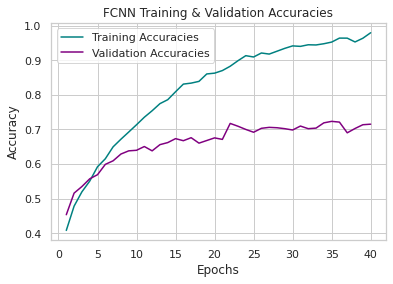

In [79]:
fcnn_train_scores = hist_model_fc.history['accuracy']
fcnn_val_scores = hist_model_fc.history['val_accuracy']
fcnn_epochs = list(range(1, 41))

fig, ax = plt.subplots()
ax.set_title('FCNN Training & Validation Accuracies')
ax.plot((fcnn_epochs), fcnn_train_scores, color='teal', label='Training Accuracies')
ax.plot((fcnn_epochs), fcnn_val_scores, color='purple', label='Validation Accuracies')
ax.set_xlabel("Epochs")
ax.set_ylabel("Accuracy")
ax.legend()
plt.savefig("fcnn_train_vs_val_accuracy.png")
plt.show()

### SVC: best params were {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}, find train and val accuracies as C varries

In [69]:
# SVM tunning
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [0.1],
              'kernel': ['rbf']}
gs = GridSearchCV(
    svm.SVC(),
    param_grid, 
    refit = True, 
    verbose = 10,
    return_train_score = True,
    n_jobs = -1
)

svc_gs_results = gs.fit(X_train,y_train)



Fitting 5 folds for each of 5 candidates, totalling 25 fits


In [74]:
svc_train_scores = svc_gs_results.cv_results_['mean_train_score']
svc_val_scores = svc_gs_results.cv_results_['mean_test_score']
svc_Cs = [pdict['C'] for pdict in svc_gs_results.cv_results_['params']]

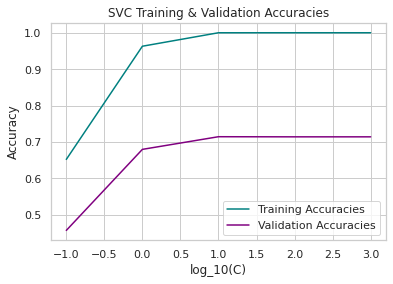

In [78]:
fig, ax = plt.subplots()
ax.set_title('SVC Training & Validation Accuracies')
ax.plot(np.log10(svc_Cs), svc_train_scores, color='teal', label='Training Accuracies')
ax.plot(np.log10(svc_Cs), svc_val_scores, color='purple', label='Validation Accuracies')
ax.set_xlabel("log_10(C)")
ax.set_ylabel("Accuracy")
ax.legend()
plt.savefig("svc_train_vs_val_accuracy.png")
plt.show()

### Fit Best Models

In [111]:
best_lda = LDA(**lda_gs_results.best_params_)
print(lda_gs_results.best_params_)
best_qda = QDA(**qda_gs_results.best_params_)
print(qda_gs_results.best_params_)
best_knc = KNC(**knc_gs_results.best_params_)
print(knc_gs_results.best_params_)
best_svc = svm.SVC(**svc_gs_results.best_params_)
print(svc_gs_results.best_params_)
print(X_train.shape)
print(y_train.shape)

best_lda.fit(X_train, y_train)
best_qda.fit(X_train, y_train)
best_knc.fit(X_train, y_train)
best_svc.fit(X_train, y_train)

{'shrinkage': 0.0001, 'solver': 'lsqr'}
{'reg_param': 0.1, 'tol': 0.0001}
{'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
(9216, 116)
(9216,)


/home/blah/.pyenv/versions/3.8.7/envs/cs289_proj_tf/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


SVC(C=10, gamma=0.1)

### Test Results

In [112]:
# LDA
from sklearn.metrics import accuracy_score
best_lda_preds = best_lda.predict(X_test)
lda_test_score = accuracy_score(y_test, best_lda_preds)
print(lda_test_score)

0.4713541666666667


In [113]:
# QDA
best_qda_preds = best_qda.predict(X_test)
qda_test_score = accuracy_score(y_test, best_qda_preds)
print(qda_test_score)

0.4861111111111111


In [114]:
# KNC
best_knc_preds = best_knc.predict(X_test)
knc_test_score = accuracy_score(y_test, best_knc_preds)
print(knc_test_score)

0.8407118055555556


In [115]:
# SVC
best_svc_preds = best_svc.predict(X_test)
svc_test_score = accuracy_score(y_test, best_svc_preds)
print(svc_test_score)

0.7374131944444444


In [116]:
# FCNN
fcnn_test_score = model_fc.evaluate(X_test, y_test)
print(fcnn_test_score[1])

72/72 [==============================] - 0s 2ms/step - loss: 1.2125 - accuracy: 0.7014
0.7013888955116272
